# [Домашнє завдання до модуля «Підходи до покращення якості»](https://www.edu.goit.global/uk/learn/25315460/23598278/25313350/homework)
___

## Імпорт необхідних модулів

In [226]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.2f}".format)

## 1. Завантаження даних

In [227]:
file_path = "../datasets/mod_05_topic_10_various_data.pkl"
data = pd.read_pickle(file_path)
df = data["autos"]

display(df.head())
print(df.shape)

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,2,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,alfa-romero,gas,std,2,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,audi,gas,std,4,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,audi,gas,std,4,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


(193, 24)


## 2. EDA

### Перевірка типів даних і відсутніх значень

In [228]:
print("\nMissing values per column in training data:")
display(df.isna().sum())

print("\nData types:")
display(df.dtypes)

print("\nSummary statistics:")
display(df.describe())
display(df.describe(include="object").T)
display(df.describe().T)


Missing values per column in training data:


make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


Data types:


make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object


Summary statistics:


,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00,193.00
mean,3.16,98.92,174.33,65.89,53.87,2561.51,4.42,128.12,3.33,3.25,9.86,103.48,5099.74,25.33,30.79,13285.03
std,0.99,6.15,12.48,2.14,2.39,526.70,1.02,41.59,0.27,0.32,4.00,37.96,468.69,6.39,6.82,8089.08
min,2.00,86.60,141.10,60.30,47.80,1488.00,3.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,2.00,94.50,166.30,64.10,52.00,2145.00,4.00,98.00,3.15,3.11,8.00,70.00,4800.00,19.00,25.00,7738.00
50%,4.00,97.00,173.20,65.40,54.10,2414.00,4.00,120.00,3.31,3.29,9.00,95.00,5100.00,25.00,30.00,10245.00
75%,4.00,102.40,184.60,66.90,55.70,2952.00,4.00,146.00,3.59,3.41,9.00,116.00,5500.00,30.00,34.00,16515.00
max,4.00,120.90,208.10,72.00,59.80,4066.00,12.00,326.00,3.94,4.17,23.00,262.00,6600.00,49.00,54.00,45400.00


,count,unique,top,freq
make,193,21,toyota,32
fuel_type,193,2,gas,174
aspiration,193,2,std,158
body_style,193,5,sedan,92
drive_wheels,193,3,fwd,114
engine_location,193,2,front,190
engine_type,193,5,ohc,141
fuel_system,193,7,mpfi,88


,count,mean,std,min,25%,50%,75%,max
num_of_doors,193.00,3.16,0.99,2.00,2.00,4.00,4.00,4.00
wheel_base,193.00,98.92,6.15,86.60,94.50,97.00,102.40,120.90
length,193.00,174.33,12.48,141.10,166.30,173.20,184.60,208.10
width,193.00,65.89,2.14,60.30,64.10,65.40,66.90,72.00
height,193.00,53.87,2.39,47.80,52.00,54.10,55.70,59.80
curb_weight,193.00,2561.51,526.70,1488.00,2145.00,2414.00,2952.00,4066.00
num_of_cylinders,193.00,4.42,1.02,3.00,4.00,4.00,4.00,12.00
engine_size,193.00,128.12,41.59,61.00,98.00,120.00,146.00,326.00
bore,193.00,3.33,0.27,2.54,3.15,3.31,3.59,3.94
stroke,193.00,3.25,0.32,2.07,3.11,3.29,3.41,4.17


Синтезуємо додаткові ознаки

In [229]:
def get_european_segment(row):
    length = row["length"]
    curb_weight = row["curb_weight"]
    engine_size = row["engine_size"]

    if length < 3700 and curb_weight < 1200 and engine_size < 1000:
        return "A" # Міні-авто
    elif length < 4200 and curb_weight < 1400 and engine_size < 1600:
        return "B" # Малі авто
    elif length < 4600 and curb_weight < 1600 and engine_size < 2000:
        return "C" # Компактні авто
    elif length < 4900 and curb_weight < 1800 and engine_size < 2500:
        return "D" # Середні авто
    elif length < 5100 and curb_weight < 2000 and engine_size < 3000:
        return "E" # Бізнес-клас
    else:
        return "F" # Преміум-клас


def get_epa_class(row):
    length = row["length"]
    width = row["width"]
    height = row["height"]
    engine_size = row["engine_size"]
    curb_weight = row["curb_weight"]

    volume = (length * width * height) / 1000000  # м³

    if volume < 2.8 and engine_size < 1600 and curb_weight < 1200:
        return "Subcompact"
    elif volume < 3.1 and engine_size < 2000 and curb_weight < 1400:
        return "Compact"
    elif volume < 3.4 and engine_size < 3000 and curb_weight < 1700:
        return "Mid-size"
    else:
        return "Full-size"

In [ ]:
# відношення довжини ходу поршня `stroke` до діаметра циліндра `borе`
df["stroke_ratio"] = df["stroke"] / df["bore"]

# make_and_style
# df["make_and_style"] = df["make"] + "_" + df["body_style"]

# Класифікація автомобілів за європейськими стандартами
# df["european_segment"] = df.apply(get_european_segment, axis=1)

# df_eu["european_segment"] = df.apply(get_european_segment, axis=1)
# one_hot = pd.get_dummies(df_eu["european_segment"], prefix="segment")
# df = pd.concat([df, one_hot], axis=1)

# Класифікація автомобілів за стандартами EPA
# df["epa_class"] = df.apply(get_epa_class, axis=1)

In [231]:
display(df.head())

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,stroke_ratio,segment_C,segment_D,segment_E,segment_F
0,alfa-romero,gas,std,2,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,0.77,False,False,False,True
1,alfa-romero,gas,std,2,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,0.77,False,False,False,True
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,1.29,False,False,False,True
3,audi,gas,std,4,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950,1.07,False,False,False,True
4,audi,gas,std,4,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450,1.07,False,False,False,True


In [232]:
display(df.skew(numeric_only=True))

num_of_doors        -0.33
wheel_base           0.98
length               0.14
width                0.86
height               0.03
curb_weight          0.67
num_of_cylinders     3.45
engine_size          2.01
bore                -0.03
stroke              -0.75
compression_ratio    2.59
horsepower           1.14
peak_rpm             0.10
city_mpg             0.67
highway_mpg          0.53
price                1.76
stroke_ratio        -0.69
segment_C           13.89
segment_D           13.89
segment_E            2.09
segment_F           -1.97
dtype: float64

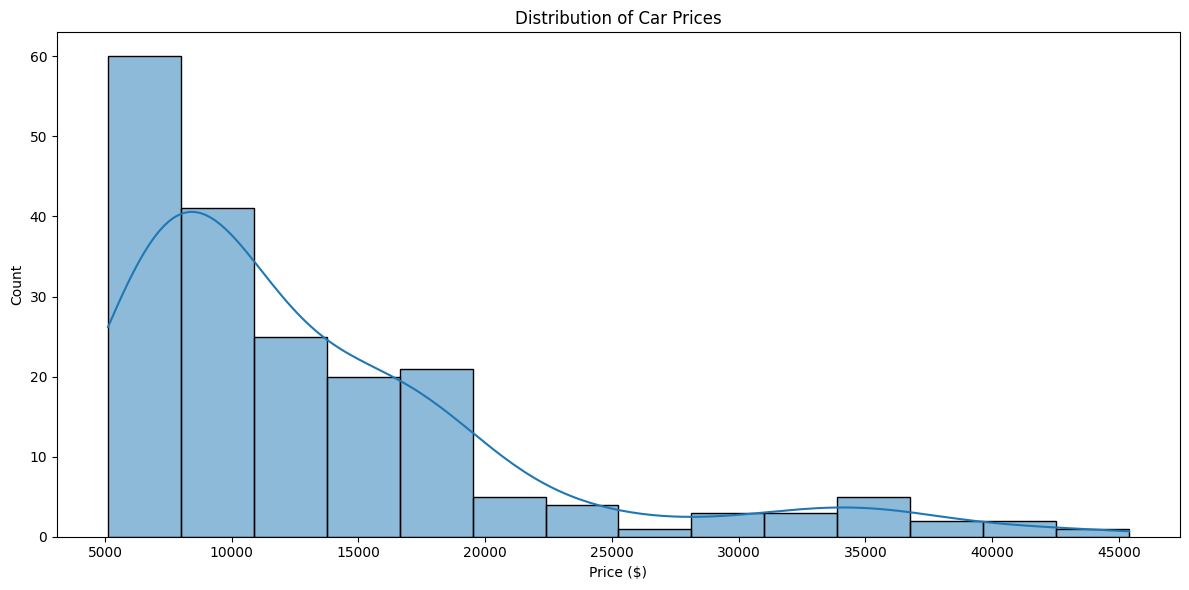

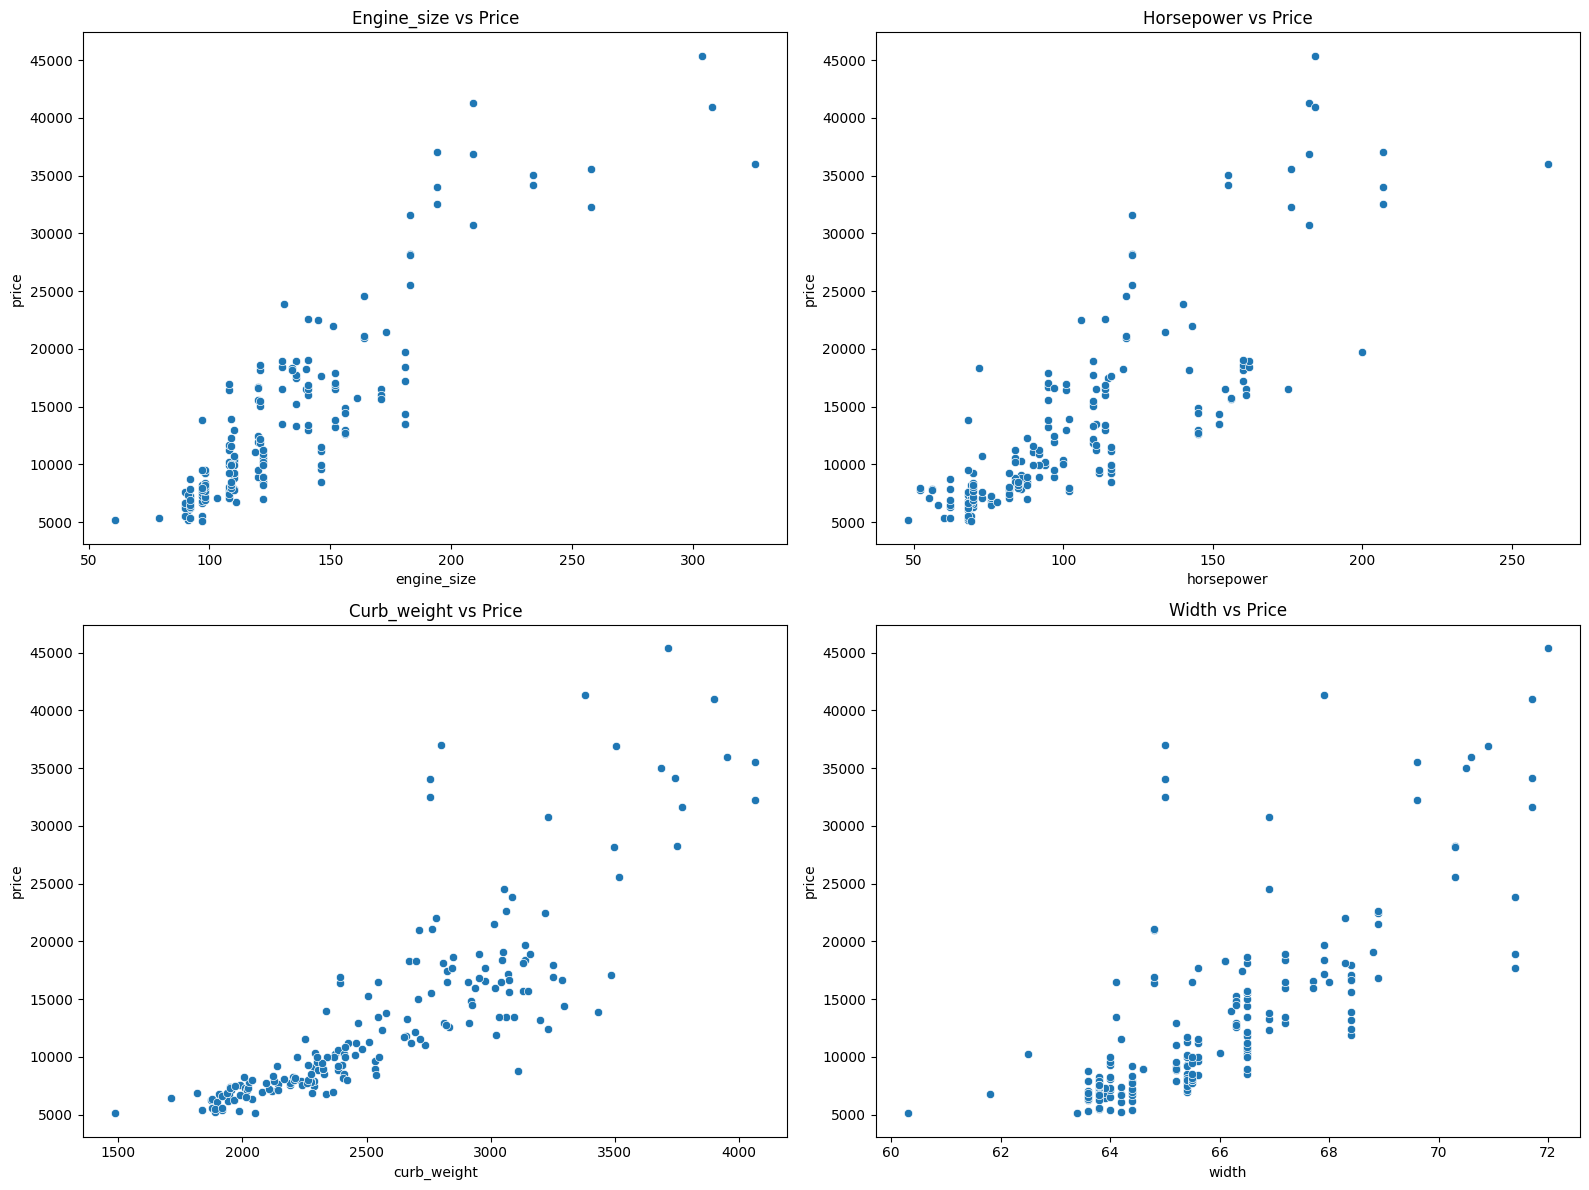

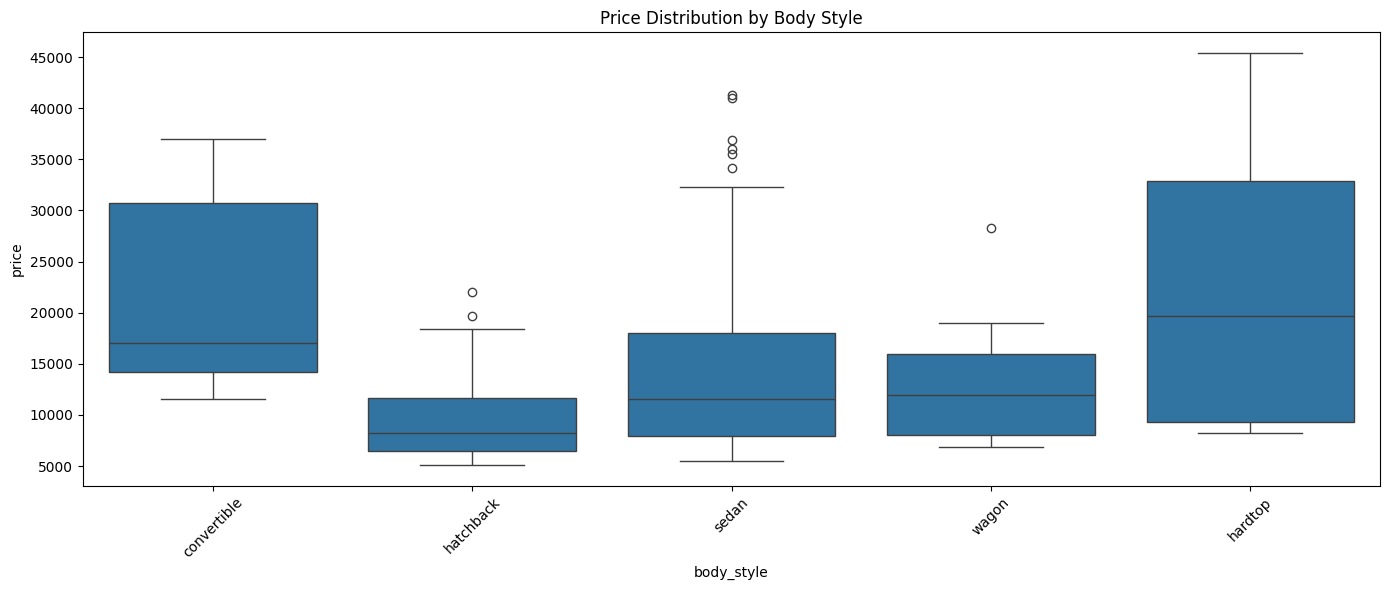

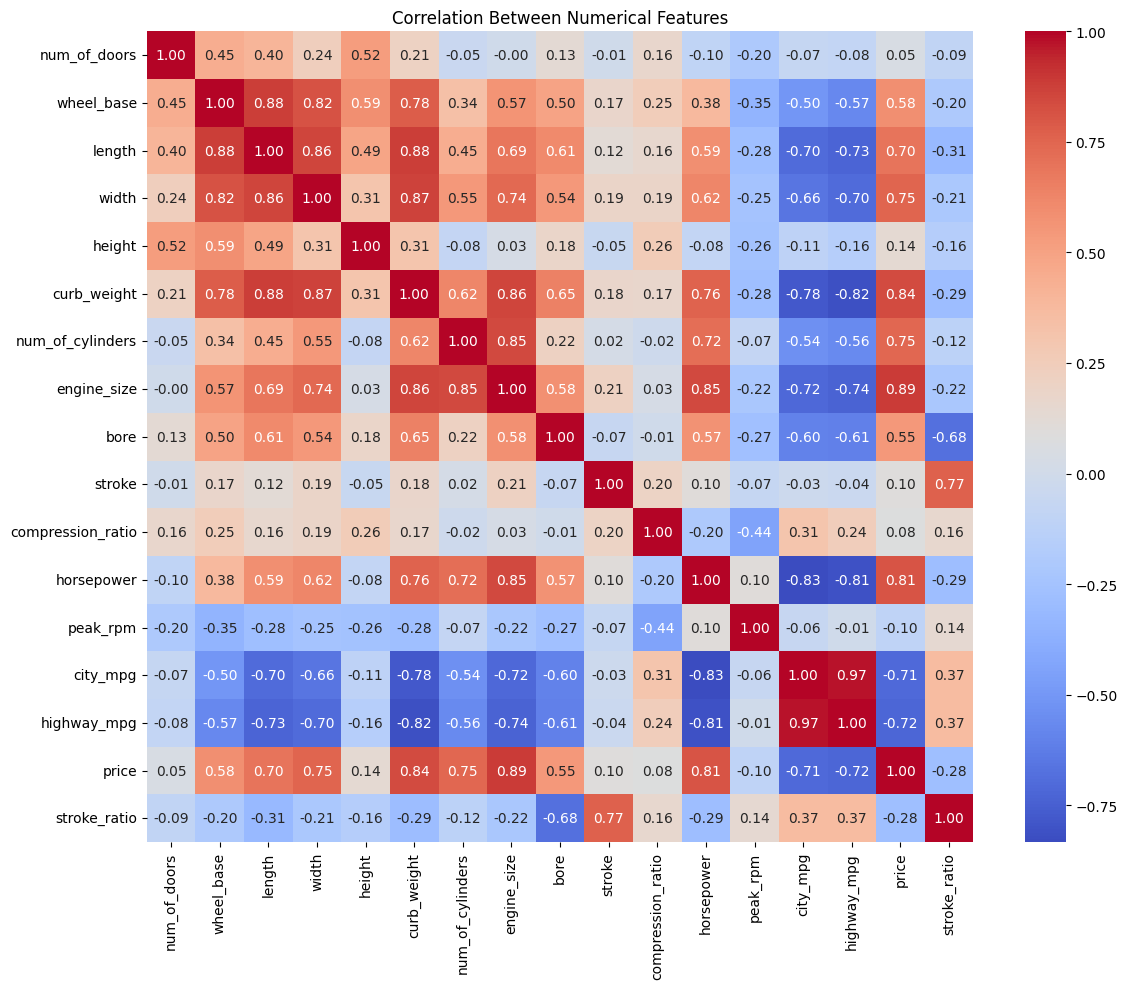

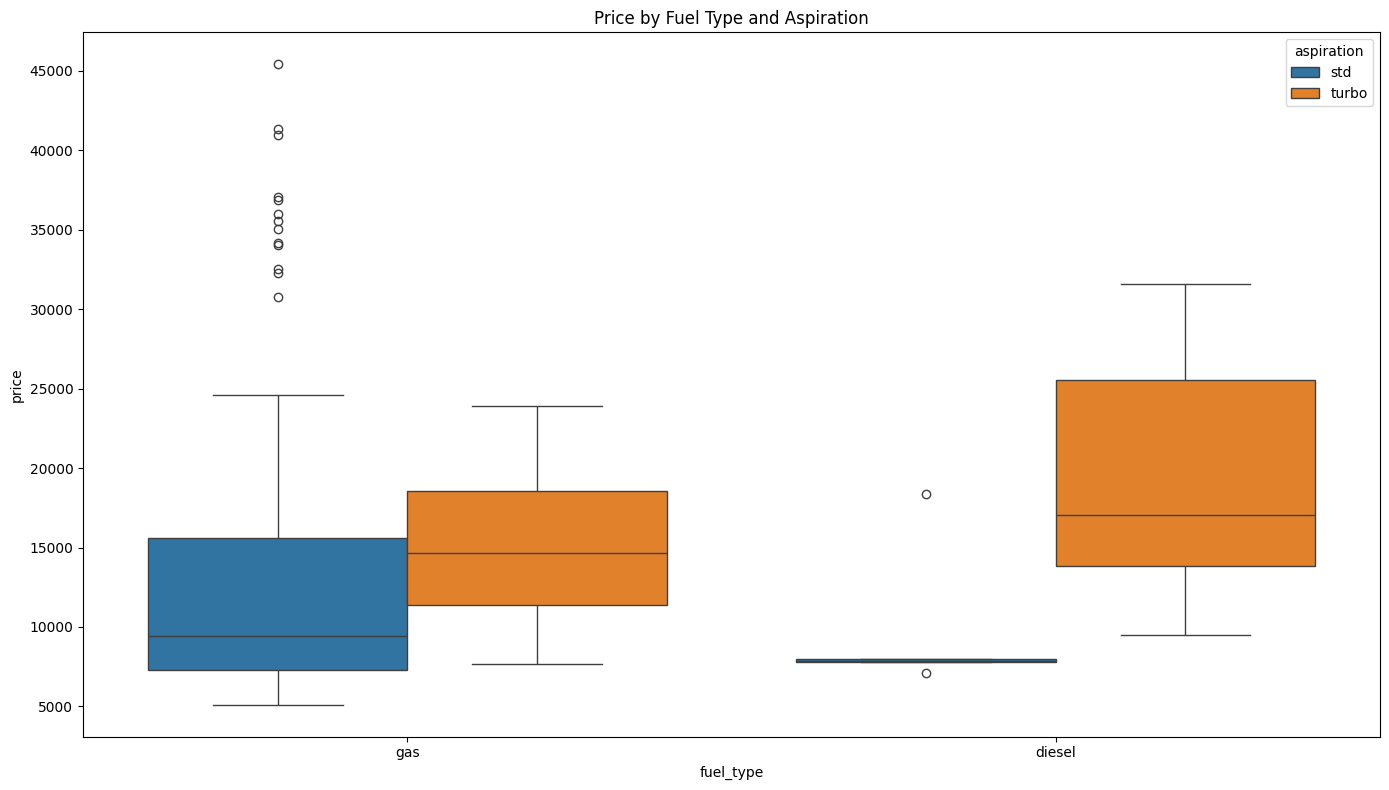

In [233]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.tight_layout()
plt.show()

# relationship between key numerical variables and price
plt.figure(figsize=(16, 12))
numerical_cols = ['engine_size', 'horsepower', 'curb_weight', 'width']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col.capitalize()} vs Price')
plt.tight_layout()
plt.show()

# Boxplot of price by body style
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='body_style', y='price')
plt.title('Price Distribution by Body Style')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap of correlations between numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
correlation = df[num_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

# Combine categorical features to see their interaction
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='fuel_type', y='price', hue='aspiration')
plt.title('Price by Fuel Type and Aspiration')
plt.tight_layout()
plt.show()

Виходячи з результатів EDA, маємо наступне:
- Усього 193 записи та 24 колонки.
- Цільова змінна: price (ціна автомобіля).
- Числові ознаки: `wheel_base`, `length`, `width`, `height`, `curb_weight`, `engine_size`, `bore`, `stroke`, `stroke_ratio`, `compression_ratio`, `horsepower`, `peak_rpm`, `city_mpg`, `highway_mpg`.
- Категоріальні ознаки: `make`, `fuel_type`, `aspiration`, `body_style`, `drive_wheels`, `engine_location`, `engine_type`, `fuel_system`.
- Дискретні ознаки: `num_of_doors`, `num_of_cylinders`.
- Турбонаддув збільшує ціну автомобіля, незалежно від типу пального.
- Дизельні авто з турбонаддувом мають вищі ціни, ніж більшість бензинових авто.
- Бензинові авто мають більше дорогих моделей, які є викидами на графіку. А це означає, що є мають бути додаткові преміальні ознаки для авто яких можливо немає в даному датасеті, цікаво чи можна буде їх витягнути з наявних?

## 3. Підготовка даних

### Визначимо ознаки та цільову змінну

In [234]:
# categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
# int_features = df.select_dtypes(include=["int64"]).columns.tolist()
# discrete_int_features = [col for col in int_features if df[col].nunique() < 10]
# discrete_features = categorical_features + discrete_int_features

In [235]:
target = "price"
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
discrete_features = ["num_of_doors", "num_of_cylinders"] + categorical_features

if target in numerical_features:
    numerical_features.remove(target)

for feature in discrete_features:
    if feature in numerical_features:
        numerical_features.remove(feature)

print("Числові ознаки:", numerical_features)
print("Дискретні ознаки:", discrete_features)
# print("Категоріальні ознаки:", categorical_features)

Числові ознаки: ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'stroke_ratio']
Дискретні ознаки: ['num_of_doors', 'num_of_cylinders', 'make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'fuel_system']


In [236]:
class FeatureProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features, encoder_type="ordinal"):
        self.categorical_features = categorical_features
        self.encoder_type = encoder_type

        if encoder_type == "ordinal":
            self.encoder = OrdinalEncoder()
        elif encoder_type == "target":
            self.encoder = ce.TargetEncoder()
        else:
            raise ValueError("Unsupported encoder type. Use 'ordinal' or 'target'")

    def fit(self, X, y=None):
        if self.encoder_type == "ordinal":
            self.encoder.fit(X[self.categorical_features])
        elif self.encoder_type == "target":
            self.encoder.fit(X[self.categorical_features], y)
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        if self.encoder_type == "ordinal":
            X_transformed[self.categorical_features] = self.encoder.transform(
                X[self.categorical_features]
            )
        elif self.encoder_type == "target":
            X_transformed[self.categorical_features] = self.encoder.transform(
                X[self.categorical_features]
            )
        return X_transformed


def compute_mutual_info(X, y):
    """
    Compute the mutual information between a set of features X and a target y
    """
    discrete_mask = np.array([col in discrete_features for col in X.columns])

    mi_scores = mutual_info_regression(
        X, y, discrete_features=discrete_mask, random_state=42
    )
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

### MI з OrdinalEncoder

In [237]:
ordinal_processor = FeatureProcessor(
    categorical_features=categorical_features, encoder_type="ordinal"
)
X_mi = ordinal_processor.fit_transform(df.drop(columns=[target]))
y = df[target]

mi_scores = compute_mutual_info(X_mi, y)
print("\nВзаємна інформація:")
print(mi_scores)


Взаємна інформація:
curb_weight         0.92
engine_size         0.89
horsepower          0.89
highway_mpg         0.87
city_mpg            0.78
width               0.70
length              0.61
wheel_base          0.58
make                0.54
fuel_system         0.48
bore                0.47
stroke_ratio        0.41
stroke              0.39
height              0.36
drive_wheels        0.33
num_of_cylinders    0.33
segment_F           0.28
segment_E           0.25
peak_rpm            0.23
engine_type         0.15
compression_ratio   0.11
aspiration          0.09
body_style          0.08
fuel_type           0.05
engine_location     0.04
num_of_doors        0.01
segment_C           0.00
segment_D           0.00
dtype: float64


### Target coding та побудова моделі

In [238]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=[target]), df[target], test_size=0.2, random_state=42
)

pipeline = Pipeline(
    [
        (
            "feature_processor",
            FeatureProcessor(
                categorical_features=categorical_features, encoder_type="target"
            ),
        ),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42)),
    ]
)

pipeline.fit(X_train, y_train)

# Оцінка якості моделі
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nМетрики моделі:\nR²: {r2:.4f} | RMSE: {rmse:.2f}")

feature_importance = pd.Series(
    pipeline.named_steps["model"].feature_importances_, index=X_train.columns
).sort_values(ascending=False)

print("\nВажливість ознак:")
print(feature_importance)

mi_ranked = mi_scores.rank(pct=True)
fi_ranked = feature_importance.rank(pct=True)

comparison_df = pd.DataFrame({"MI Scores": mi_ranked, "GB Scores": fi_ranked})

# Without stroke_ratio
# R²: 0.9306 | RMSE: 2793.24

# With stroke_ratio
# R²: 0.9313 | RMSE: 2778.69

# With make_and_style
# R²: 0.8726 | RMSE: 3783.25

# With european_segment
# R²: 0.9305 | RMSE: 2794.25

# With epa_class
# R²: 0.9259 | RMSE: 2885.63


Метрики моделі:
R²: 0.9258 | RMSE: 2887.10

Важливість ознак:
curb_weight         0.38
engine_size         0.31
make                0.22
horsepower          0.02
highway_mpg         0.02
width               0.01
engine_type         0.01
height              0.01
city_mpg            0.01
wheel_base          0.00
length              0.00
fuel_system         0.00
stroke_ratio        0.00
body_style          0.00
peak_rpm            0.00
bore                0.00
drive_wheels        0.00
num_of_cylinders    0.00
stroke              0.00
compression_ratio   0.00
aspiration          0.00
fuel_type           0.00
num_of_doors        0.00
segment_F           0.00
engine_location     0.00
segment_E           0.00
segment_D           0.00
segment_C           0.00
dtype: float64


In [239]:
print("\nРізниця між рангами (MI - FI):")
rank_diff = mi_ranked - fi_ranked
print("Ознаки, переоцінені взаємною інформацією (найбільша різниця):")
display(rank_diff.sort_values(ascending=False))
print("\nОзнаки, недооцінені взаємною інформацією (найменша різниця):")
display(rank_diff.sort_values())


Різниця між рангами (MI - FI):
Ознаки, переоцінені взаємною інформацією (найбільша різниця):


segment_E            0.29
segment_F            0.25
stroke               0.21
bore                 0.18
length               0.14
city_mpg             0.14
fuel_system          0.07
num_of_cylinders     0.07
drive_wheels         0.07
wheel_base           0.07
highway_mpg          0.04
segment_C            0.04
horsepower           0.04
stroke_ratio         0.04
width                0.00
engine_size          0.00
curb_weight          0.00
engine_location      0.00
aspiration          -0.04
segment_D           -0.04
compression_ratio   -0.04
fuel_type           -0.07
num_of_doors        -0.11
peak_rpm            -0.14
make                -0.21
height              -0.21
body_style          -0.32
engine_type         -0.46
dtype: float64


Ознаки, недооцінені взаємною інформацією (найменша різниця):


engine_type         -0.46
body_style          -0.32
height              -0.21
make                -0.21
peak_rpm            -0.14
num_of_doors        -0.11
fuel_type           -0.07
compression_ratio   -0.04
segment_D           -0.04
aspiration          -0.04
engine_location      0.00
width                0.00
engine_size          0.00
curb_weight          0.00
stroke_ratio         0.04
horsepower           0.04
segment_C            0.04
highway_mpg          0.04
wheel_base           0.07
num_of_cylinders     0.07
drive_wheels         0.07
fuel_system          0.07
city_mpg             0.14
length               0.14
bore                 0.18
stroke               0.21
segment_F            0.25
segment_E            0.29
dtype: float64

### Візуалізація

<Figure size 1200x800 with 0 Axes>

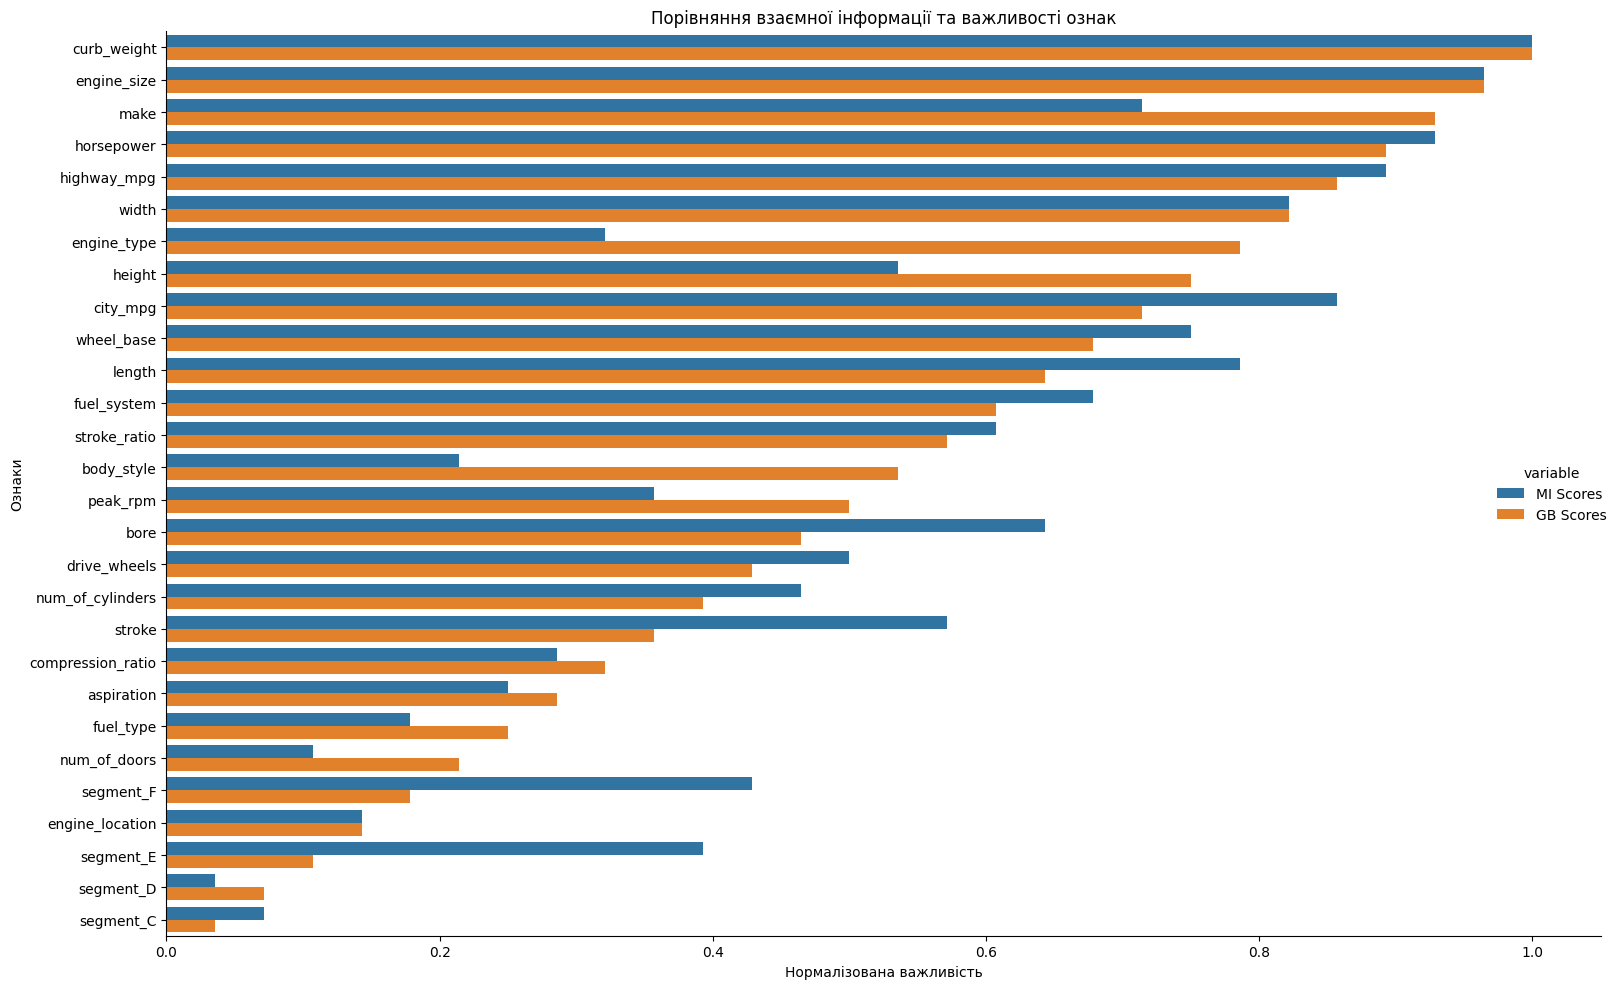

In [240]:
comparison_df = comparison_df.sort_values(by="GB Scores", ascending=False)

comparison_melted = comparison_df.reset_index().melt(
    id_vars="index", var_name="variable", value_name="value"
)

plt.figure(figsize=(12, 8))
sns.catplot(
    data=comparison_melted,
    x="value",
    y="index",
    hue="variable",
    kind="bar",
    height=10,
    aspect=1.5,
    orient="h",
)
plt.xlabel("Нормалізована важливість")
plt.ylabel("Ознаки")
plt.title("Порівняння взаємної інформації та важливості ознак")
plt.tight_layout()
plt.show()

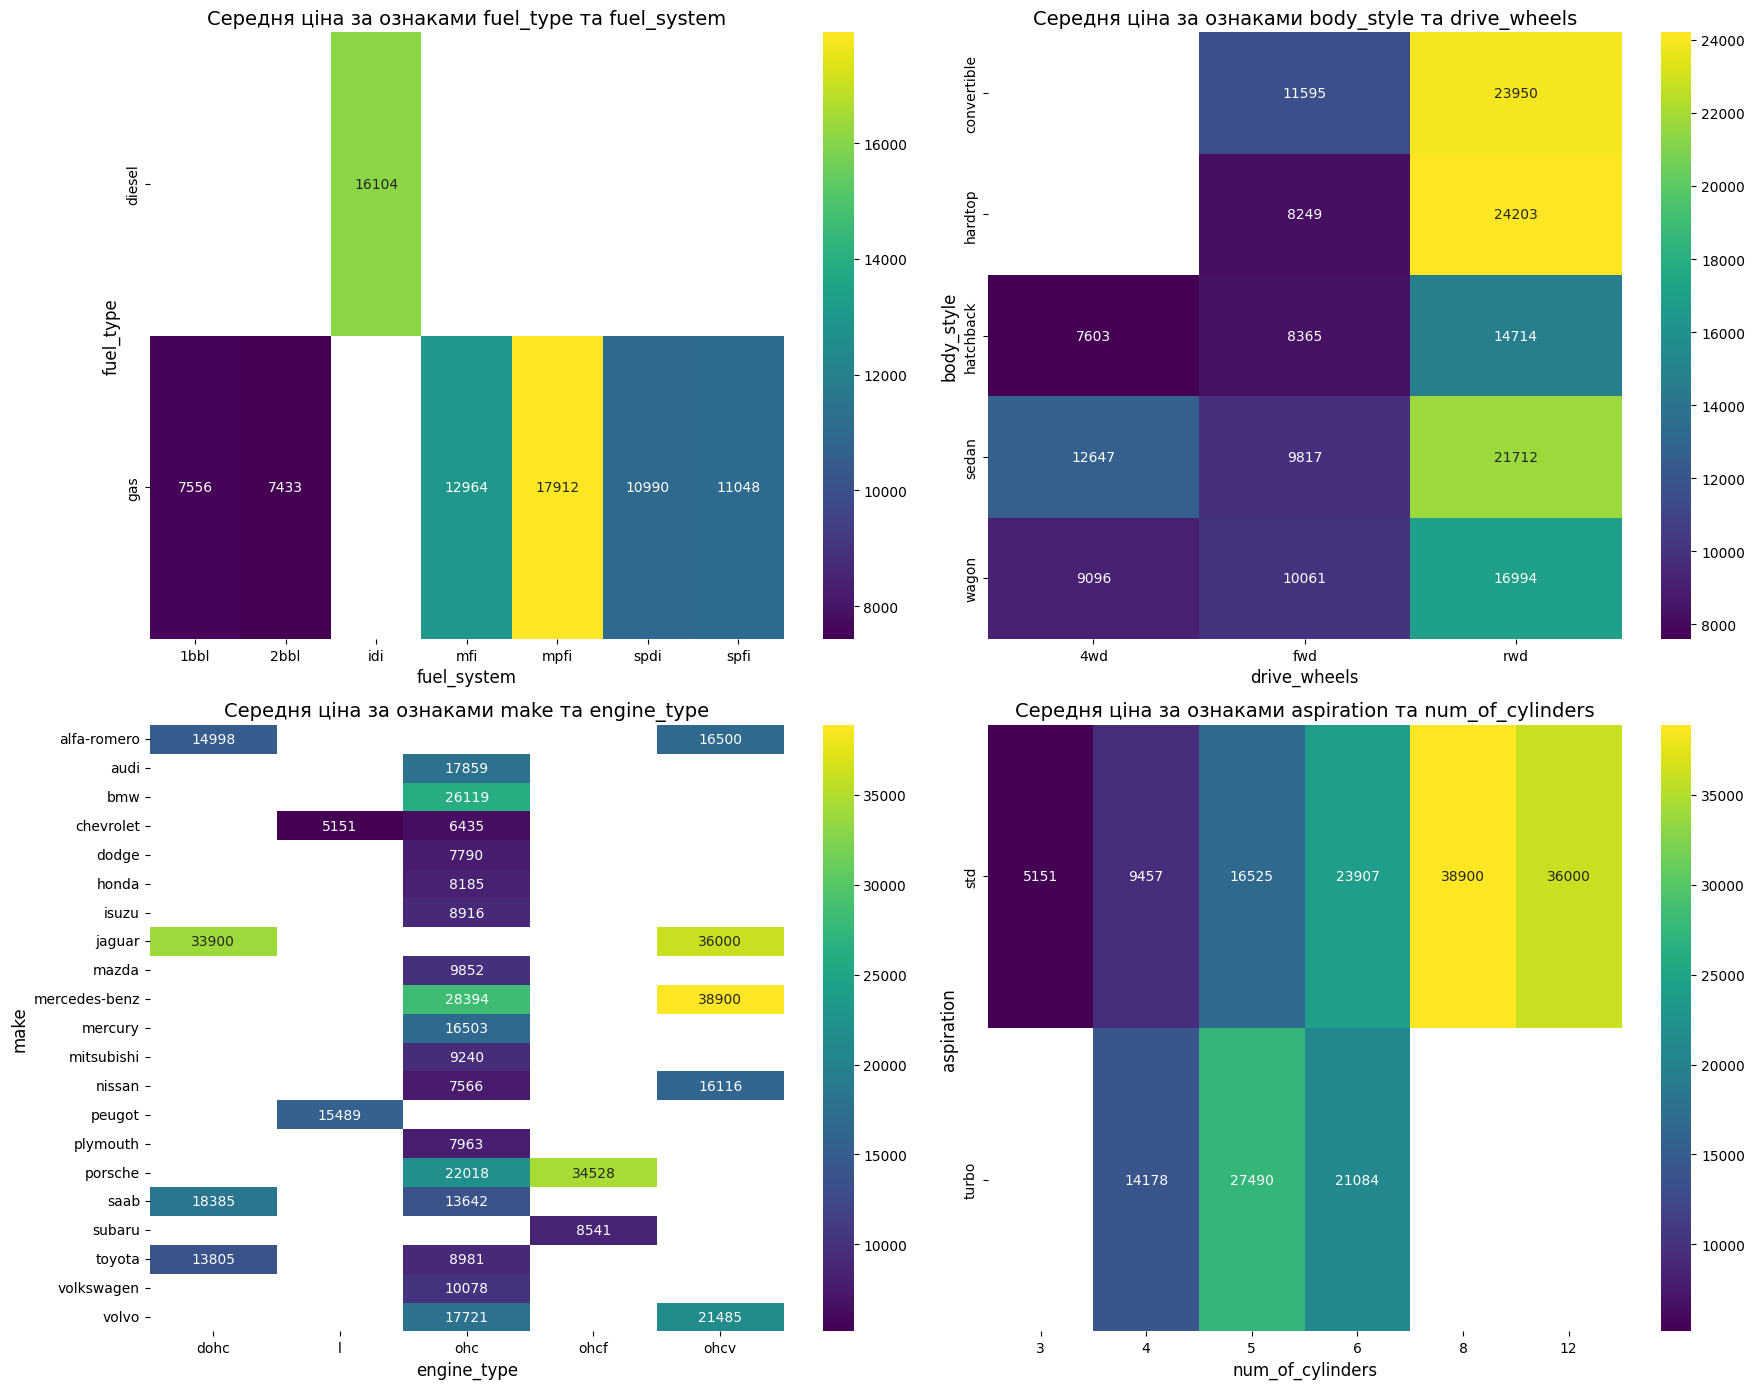

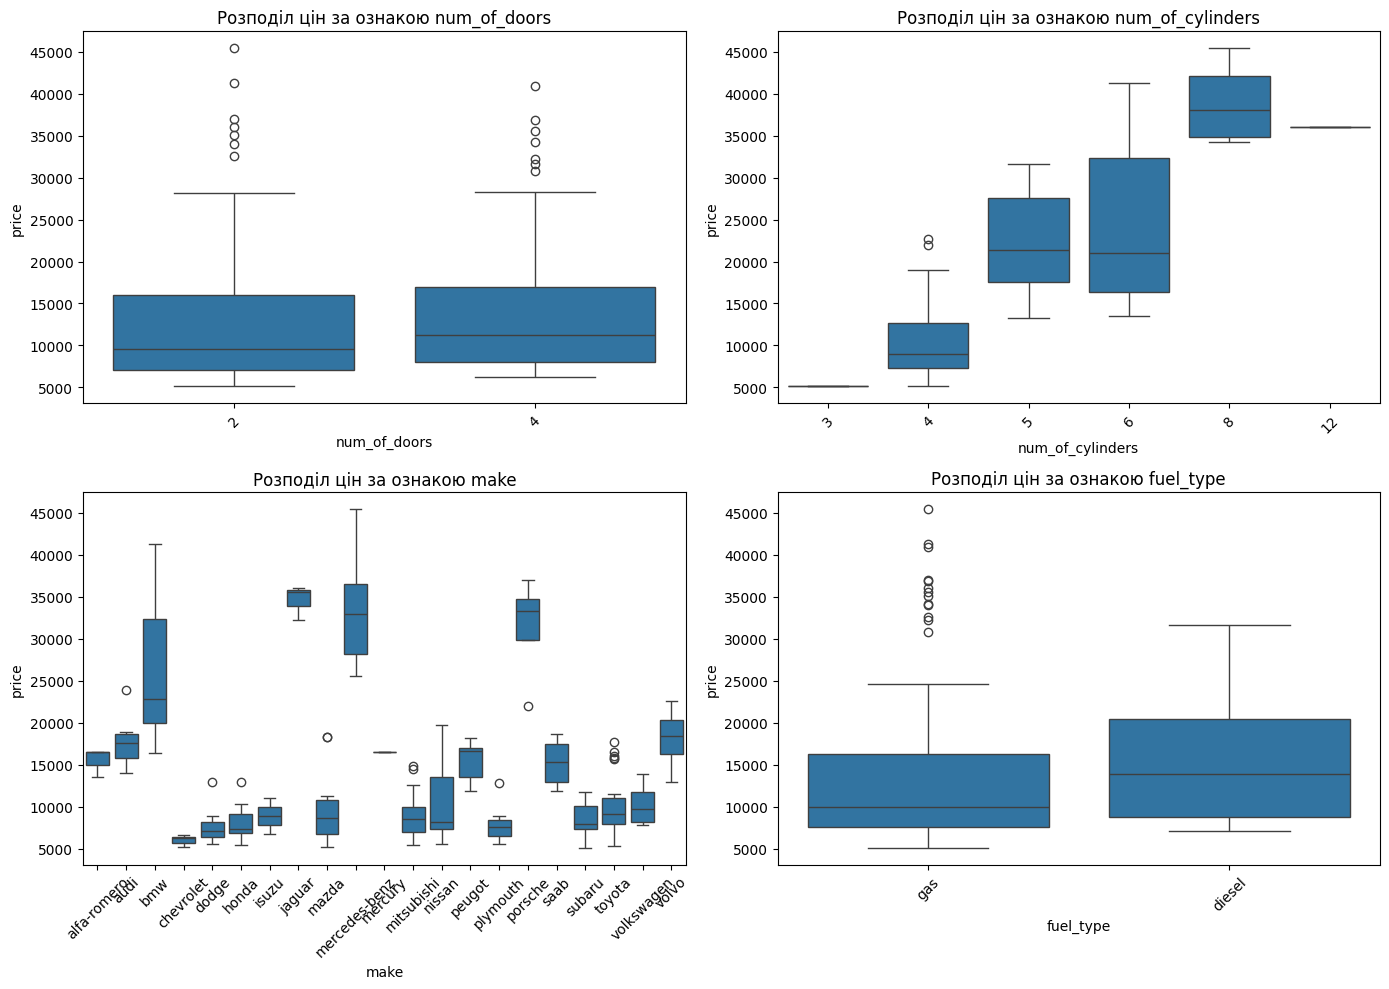

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

feature_pairs = [
    ('fuel_type', 'fuel_system'),
    ('body_style', 'drive_wheels'),
    ('make', 'engine_type'),
    ('aspiration', 'num_of_cylinders')
]

for i, (feat1, feat2) in enumerate(feature_pairs):
    cross_tab = pd.crosstab(df[feat1], df[feat2], values=df["price"], aggfunc="mean")
    sns.heatmap(cross_tab, annot=True, cmap="viridis", fmt=".0f", ax=axes[i], cbar=True)
    axes[i].set_title(f"Середня ціна за ознаками {feat1} та {feat2}", fontsize=14)
    axes[i].set_ylabel(feat1, fontsize=12)
    axes[i].set_xlabel(feat2, fontsize=12)

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 10))
for i, feat in enumerate(discrete_features[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=feat, y='price', data=df)
    plt.title(f'Розподіл цін за ознакою {feat}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

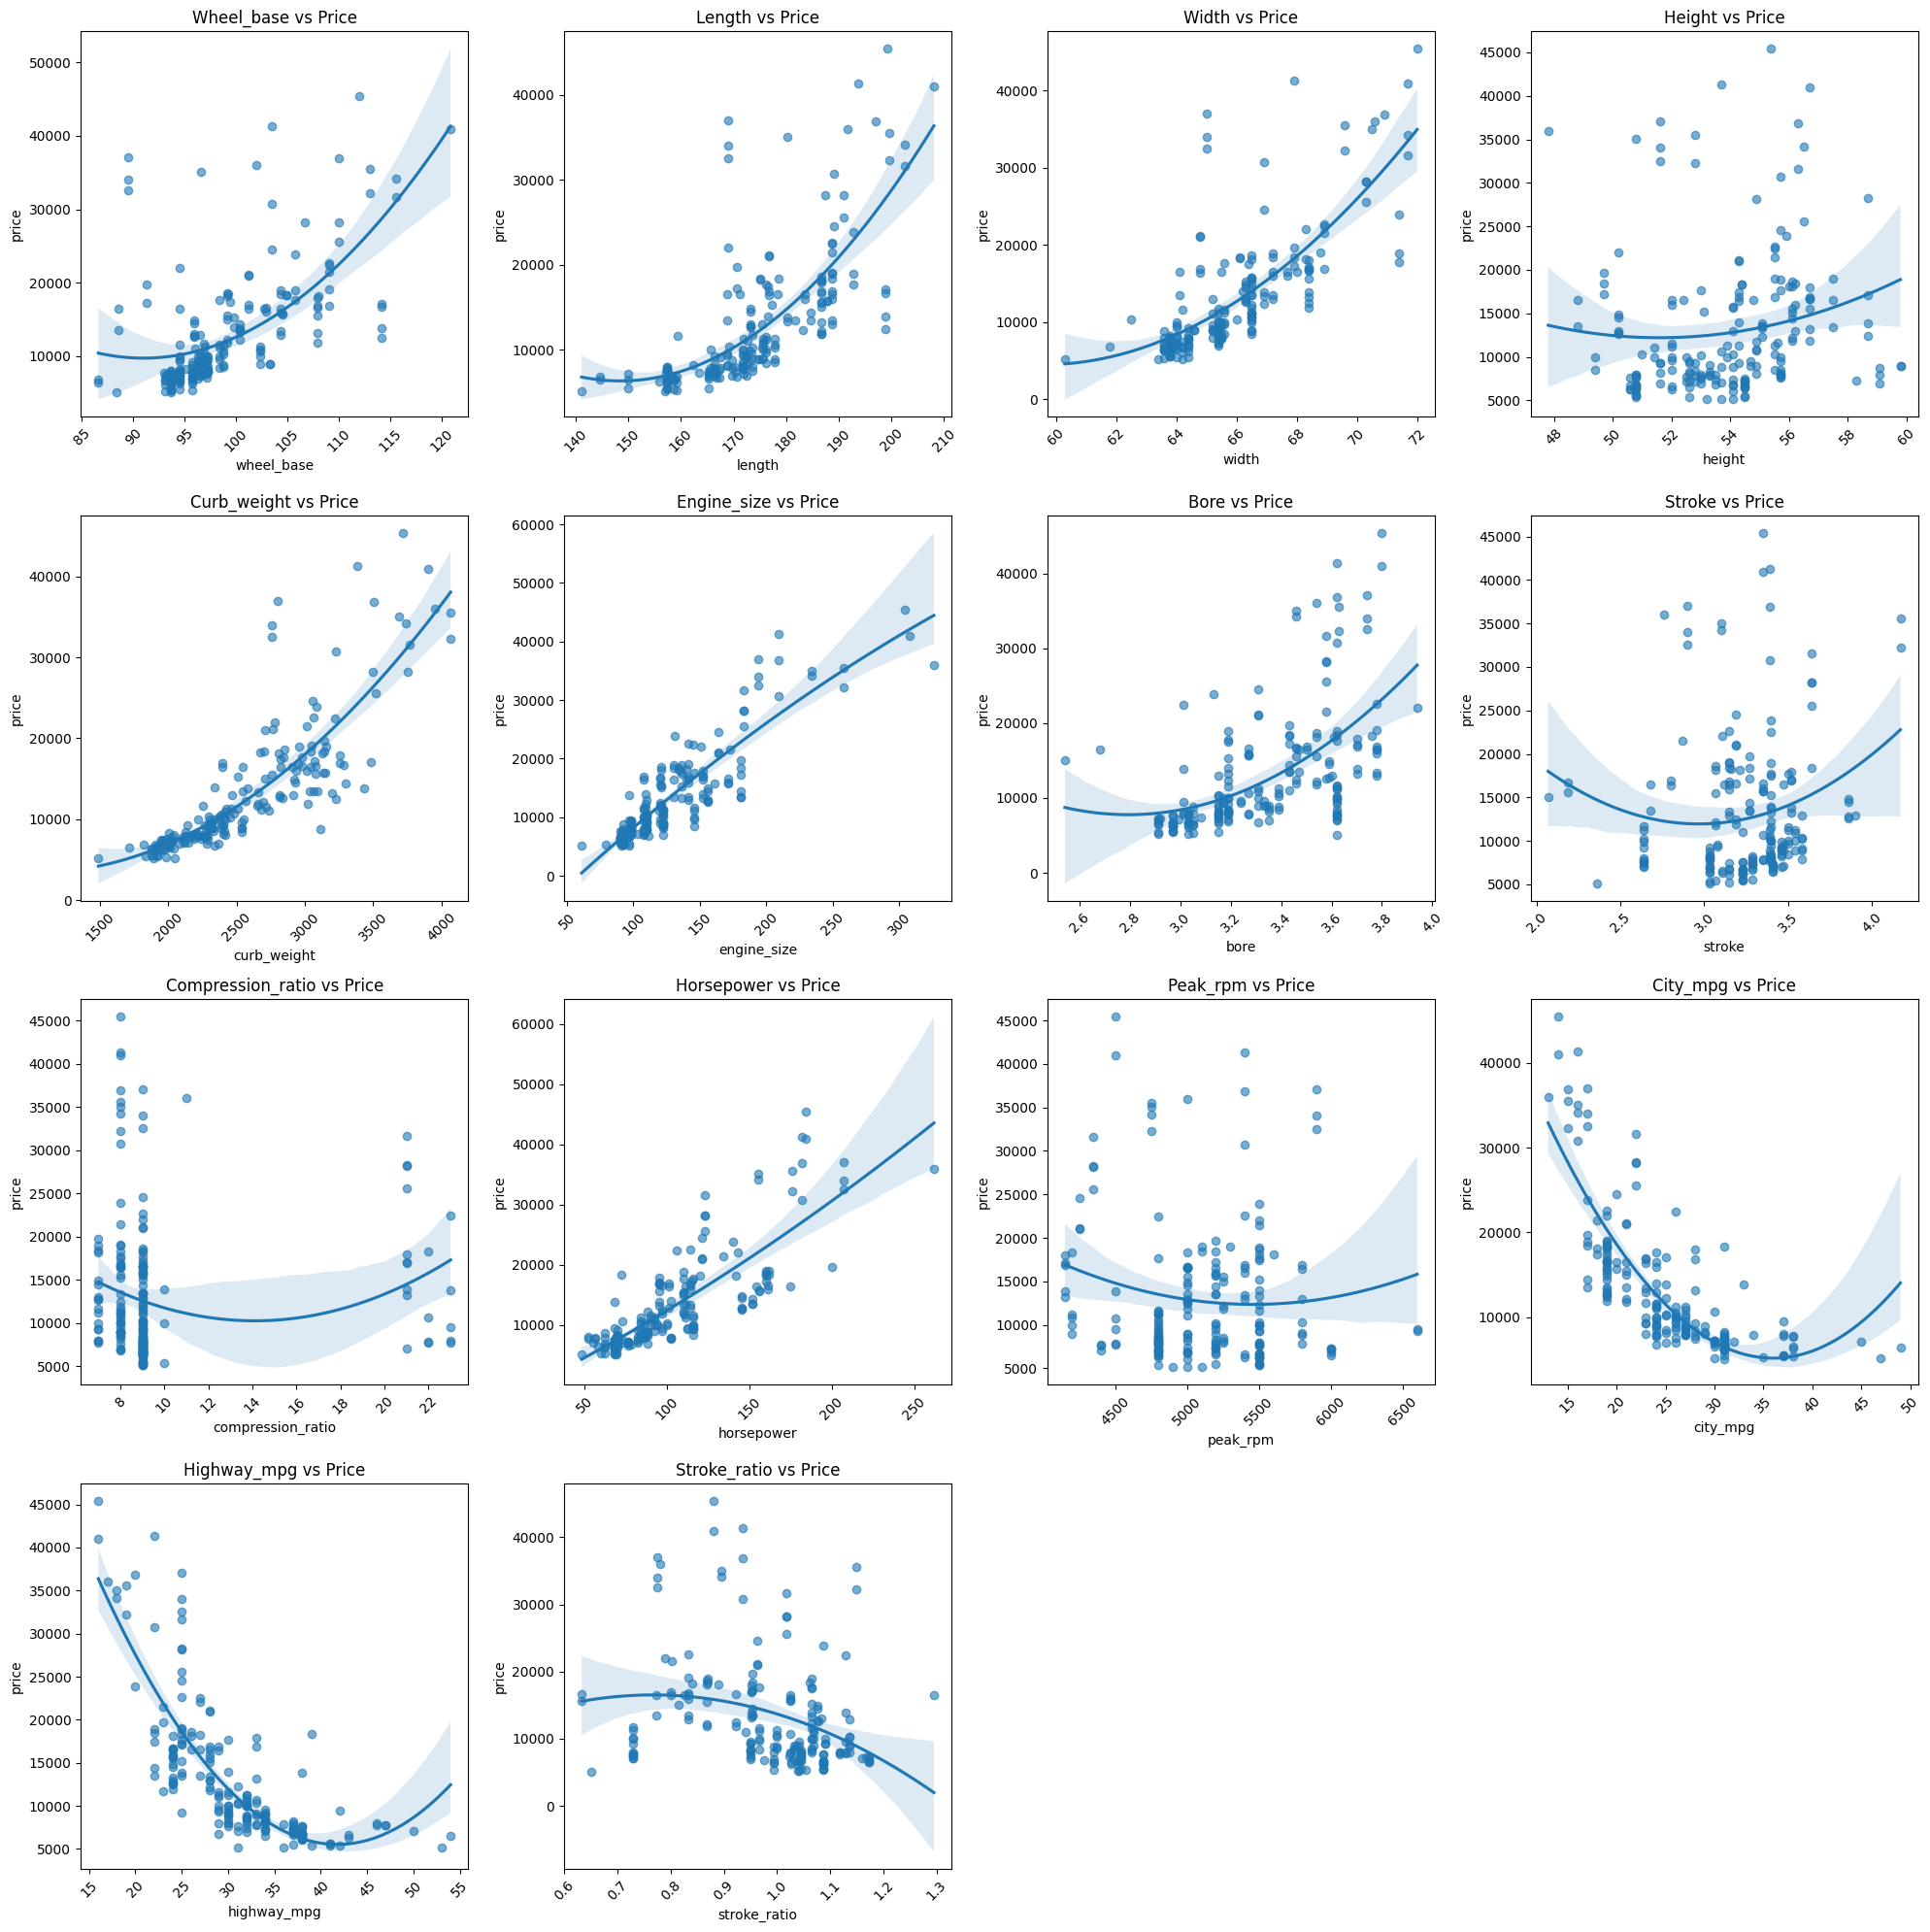

In [242]:
plt.figure(figsize=(20, 20))
for i, feat in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.regplot(data=df, x=feat, y="price", order=2, scatter_kws={"alpha": 0.6})
    plt.title(f"{feat.capitalize()} vs Price")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

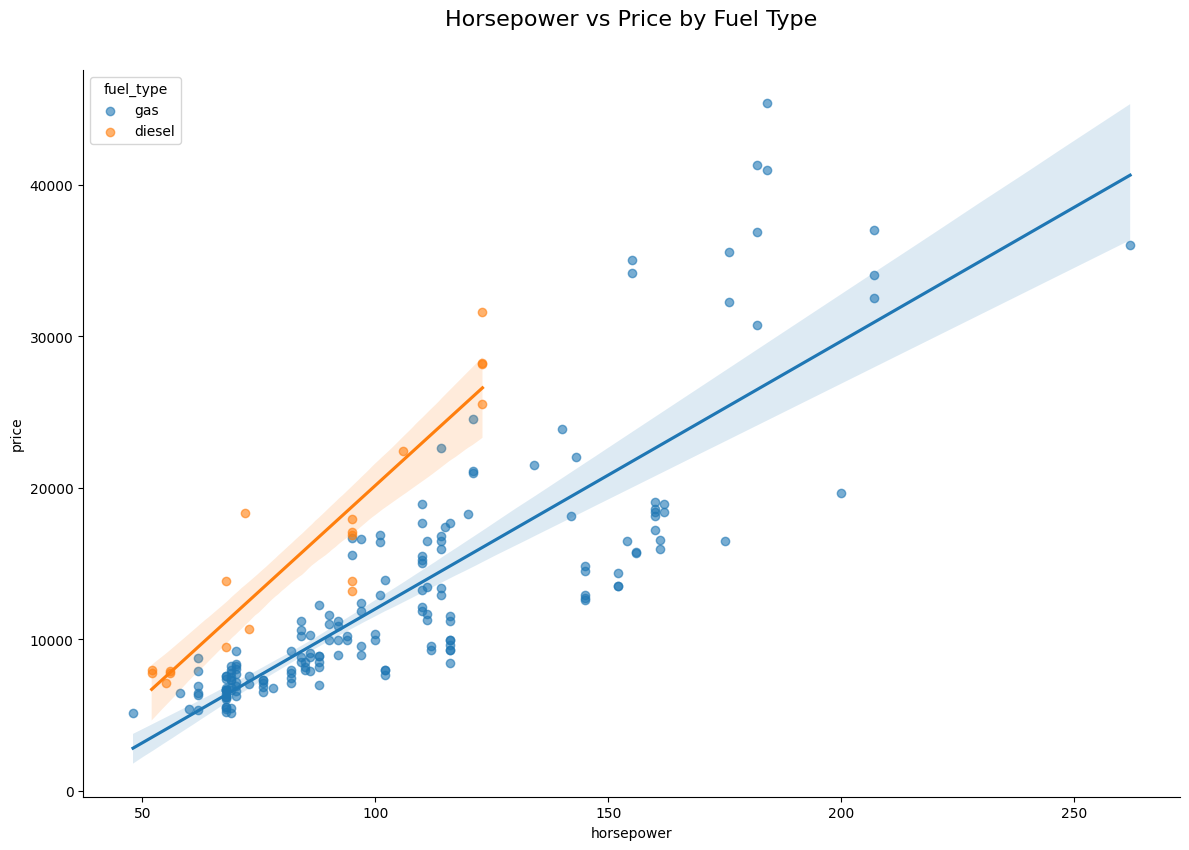

In [243]:
plt.figure(figsize=(12, 8))
sns.lmplot(
    data=df,
    x="horsepower",
    y="price",
    hue="fuel_type",
    height=8,
    aspect=1.5,
    scatter_kws={"alpha": 0.6},
    facet_kws={"legend_out": False},
)
plt.title("Horsepower vs Price by Fuel Type", fontsize=16, y=1.05)
plt.show()

<Figure size 1200x800 with 0 Axes>

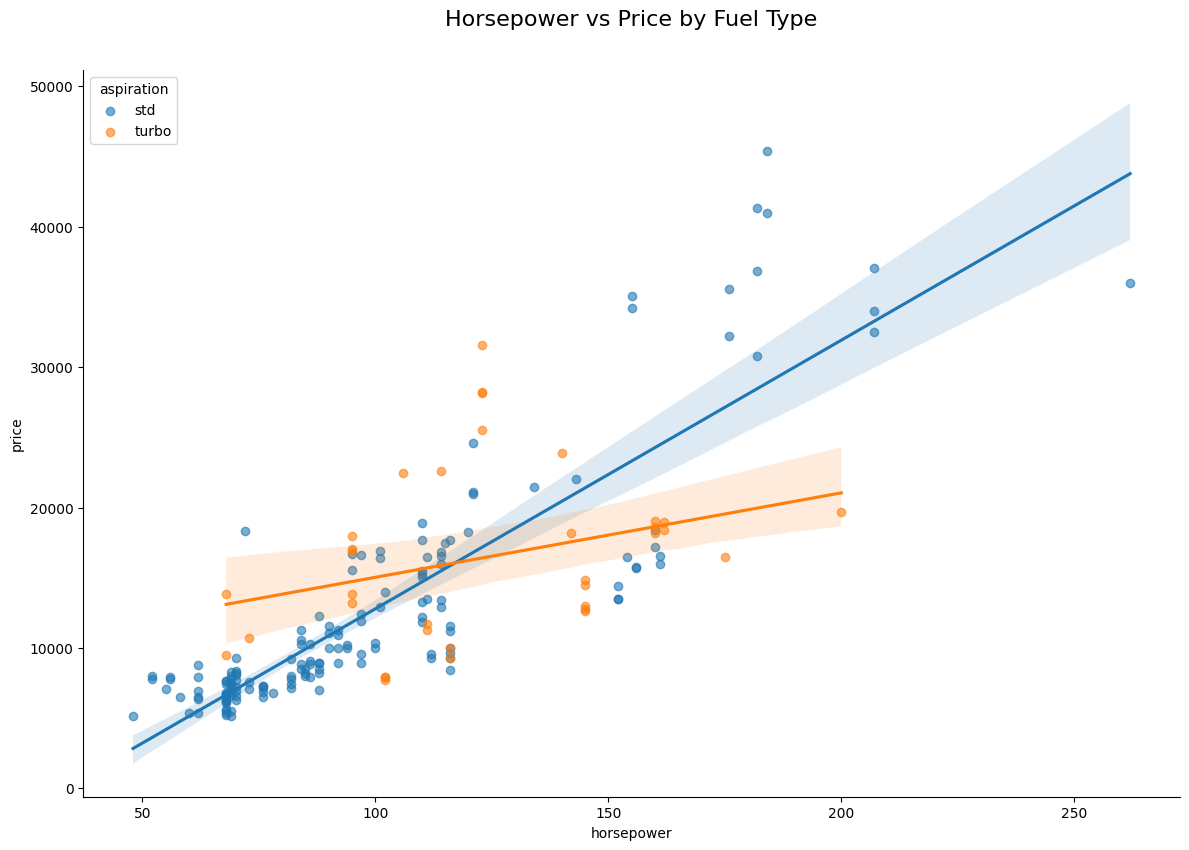

In [244]:
plt.figure(figsize=(12, 8))
sns.lmplot(
    data=df,
    x="horsepower",
    y="price",
    hue="aspiration",
    height=8,
    aspect=1.5,
    scatter_kws={"alpha": 0.6},
    facet_kws={"legend_out": False},
)
plt.title("Horsepower vs Price by Fuel Type", fontsize=16, y=1.05)
plt.show()

One-hot encoded european_segment categories:
segment_C      1
segment_D      1
segment_E     27
segment_F    164
dtype: int64


<Figure size 1200x800 with 0 Axes>

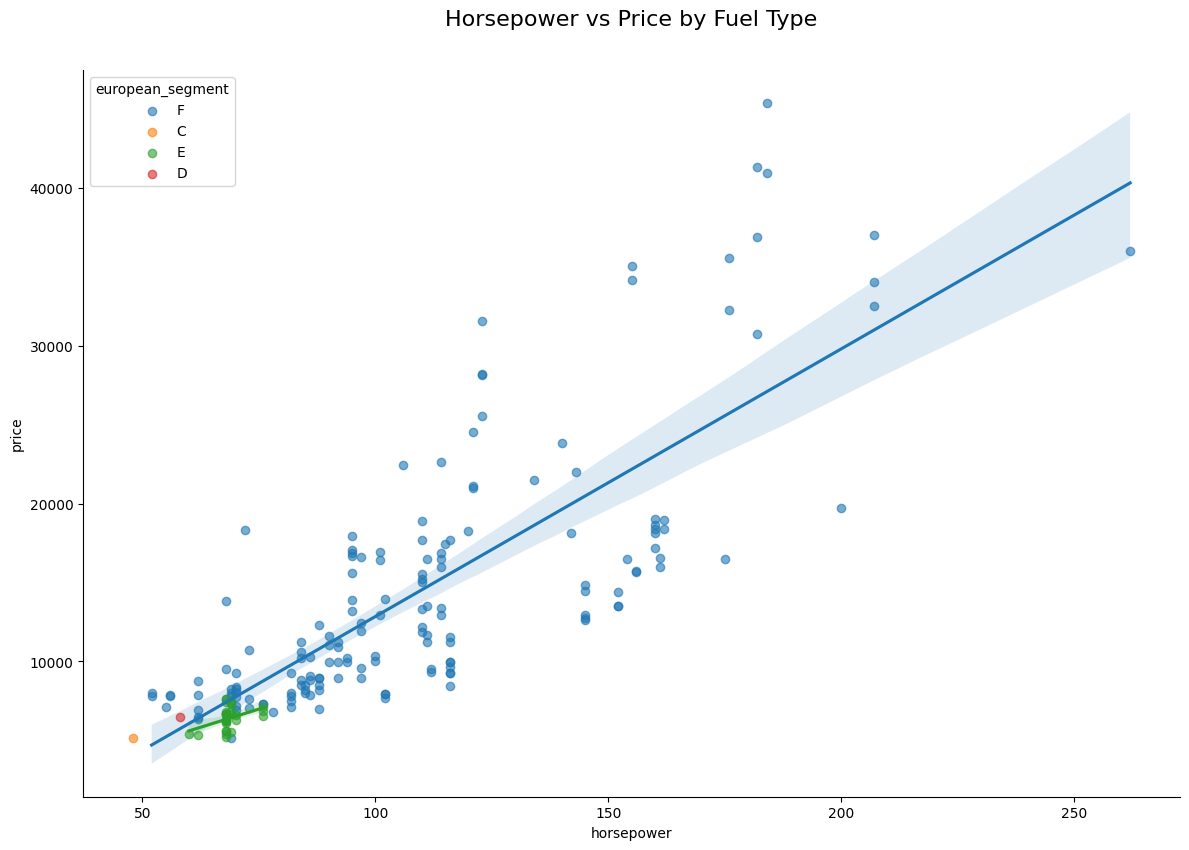

In [249]:
df_eu = df.copy()
df_eu["european_segment"] = df_eu.apply(get_european_segment, axis=1)
# Create one-hot encoded features for european_segment
one_hot = pd.get_dummies(df_eu['european_segment'], prefix='segment')

df_eu = pd.concat([df_eu, one_hot], axis=1)

print("One-hot encoded european_segment categories:")
print(one_hot.sum())

plt.figure(figsize=(12, 8))
sns.lmplot(
    data=df_eu,
    x="horsepower",
    y="price",
    hue="european_segment",
    height=8,
    aspect=1.5,
    scatter_kws={"alpha": 0.6},
    facet_kws={"legend_out": False},
)
plt.title("Horsepower vs Price by Fuel Type", fontsize=16, y=1.05)
plt.show()

## Висновки

1. Взаємна інформація та важливість ознак у моделі часто дають різні оцінки, що підтверджує
   тезу про те, що навіть ознаки з низьким MI можуть бути корисними для моделювання.
2. На графіку "Порівняння взаємної інформації та важливості ознак", чітко видно, які ознаки є найважливішими для моделі.
   Тепер ми можемо легко порівняти, як метод взаємної інформації оцінює ці самі ознаки.
3. Деякі ознаки з високою важливістю для моделі мають відносно низькі показники взаємної інформації,
   що підтверджує початкову гіпотезу завдання про корисність ознак з низьким MI.
4. Ознаки на верхніх позиціях графіка є ключовими предикторами для визначення ціни автомобіля,
   серед них найбільш впливовими є `curb_weight`, horsepower та `engine_size`.
5. `Target encoding` допомагає більш ефективно використовувати категоріальні ознаки 
   для прогнозування, оскільки враховує їх зв'язок з цільовою змінною.
6. Щодо синтезу додаткових ознак, корисними можуть бути:
   - Об'єм (габарити) автомобіля в поєднанні з місцем продажу. Для великих міст ця ознака може бути важливою і впливати на ціну.
   - Об'єм багажника також може впливати на ціну для певних груп автомобілів, наприклад: мінівени, пікапи, універсали.
   - Кліренс авто, для бездоріжних ділянок, але не зрозуміло як це отримати з наявних даних.
   - Оздобрелення салону, комплектація - це суттєво впливає на ціну, це також помітно на графіках у вигляді викидів, але знову ж таки не зрозуміло як це витянгути з поточних даних, отже потрібна додаткова інформація від власника даних. Або за наявності моделі авто можна додатково знайти цю інформацію у відкритих джерелах.
   - Також було б цікаво проаналізувати ціну авто залежно від регіону де воно продається, розподіл попиту залежно від типу місцевості.
   - При спробі додати клас автомобіля відповідно до критеріїв класифікації автомобілів відповідно до європейських сегментів та американської класифікації EPA - більшу значущісь показала ознака класифікації за європейськими критеріями. Водночас додавання розподілу на сегменти понизило точність моделі та збільшило похибку.
      - Without stroke_ratio - R²: 0.9306 | RMSE: 2793.24
      - With stroke_ratio - R²: 0.9313 | RMSE: 2778.69
      - With make_and_style -  R²: 0.8726 | RMSE: 3783.25
      - With european_segment - R²: 0.9305 | RMSE: 2794.25
      - With epa_class - R²: 0.9259 | RMSE: 2885.63